In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")
df

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
0,0.001450,0.125011,0.176033,0.000000,0.211458,0.209182,0.145823,1.624200e-15,2.52457,2.94874,...,0,0,0,0,1,1000,0,-10,0.331264,-1.104839
1,0.006283,0.125011,0.176033,0.000012,0.206329,0.206513,0.150478,1.643320e-15,2.32290,2.46553,...,0,0,0,0,1,1000,0,-10,0.328425,-1.113447
2,0.009633,0.125011,0.172626,0.000013,0.206351,0.194663,0.148313,1.528270e-15,2.26458,2.55488,...,0,0,0,0,1,1000,0,-10,0.320111,-1.139087
3,0.013200,0.125011,0.172626,0.000014,0.214463,0.214489,0.155652,1.791370e-15,2.53380,2.66379,...,0,0,0,0,1,1000,0,-10,0.340921,-1.076103
4,0.016583,0.125011,0.172626,0.000015,0.210449,0.198857,0.154162,1.594310e-15,2.51443,2.81510,...,0,0,0,0,1,1000,0,-10,0.328023,-1.114673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390057,27.302300,0.500044,0.515140,0.043543,0.554265,0.560519,1.633510,1.712510e-15,3.10602,3.09644,...,0,0,0,0,0,2000,50,45,1.813766,0.595405
390058,27.305700,0.500044,0.515140,0.043541,0.554672,0.560996,1.646360,1.711110e-15,3.10423,3.09293,...,0,0,0,0,0,2000,50,45,1.825617,0.601918
390059,27.309200,0.500044,0.515140,0.043536,0.555249,0.561109,1.645410,1.710140e-15,3.11372,3.09118,...,0,0,0,0,0,2000,50,45,1.824971,0.601564
390060,27.312500,0.500044,0.515305,0.043532,0.555029,0.560672,1.640060,1.711640e-15,3.11269,3.09097,...,0,0,0,0,0,2000,50,45,1.819947,0.598807


In [28]:
c1 = df[(df['RPM'] == 1000) & (df['HUMIDITY%'] == 50) & (df['TEMPERATURE_Celsius'] == 30) & (df['FAULT'] == 0)]['Channel 1']
c1_faulty = df[(df['RPM'] == 1000) & (df['HUMIDITY%'] == 50) & (df['TEMPERATURE_Celsius'] == 30) & (df['FAULT'] == 1)]['Channel 1']

c2 = df[(df['RPM'] == 1000) & (df['HUMIDITY%'] == 50) & (df['TEMPERATURE_Celsius'] == 30)& (df['FAULT'] == 0)]['Channel 2']
c2_faulty = df[(df['RPM'] == 1000) & (df['HUMIDITY%'] == 50) & (df['TEMPERATURE_Celsius'] == 30)& (df['FAULT'] == 1)]['Channel 2']

c3 = df[(df['RPM'] == 1000) & (df['HUMIDITY%'] == 50) & (df['TEMPERATURE_Celsius'] == 30)& (df['FAULT'] == 0)]['Channel 3']
c3_faulty = df[(df['RPM'] == 1000) & (df['HUMIDITY%'] == 50) & (df['TEMPERATURE_Celsius'] == 30)& (df['FAULT'] == 1)]['Channel 3']

<Axes: ylabel='Frequency'>

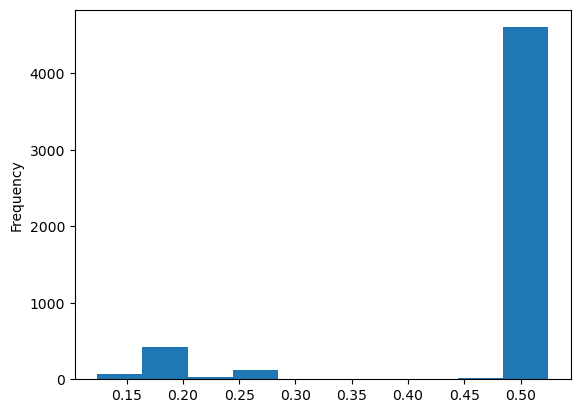

In [15]:
c1.plot(kind='hist')

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Канал 3 Разпределение без повреда')

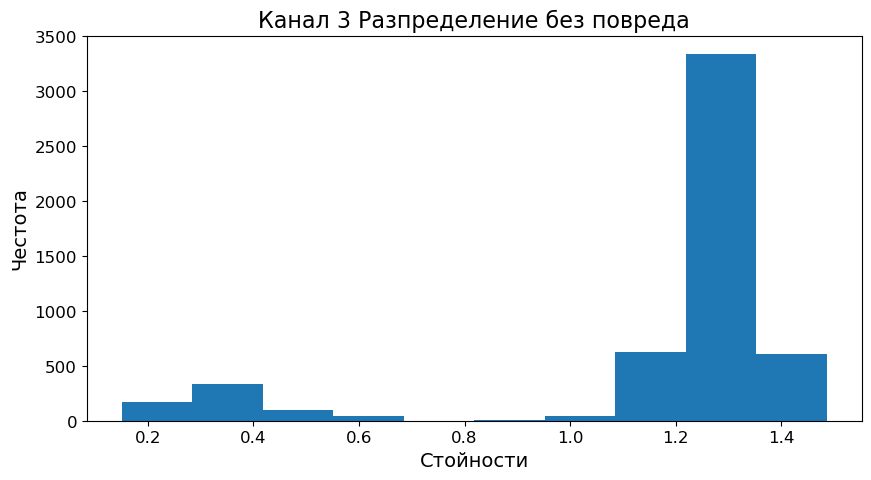

In [49]:
plt.figure(figsize=(10, 5))
plt.hist(c3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Честота', fontdict= {'fontsize' : 14})
plt.xlabel('Стойности', fontdict= {'fontsize' : 14})
plt.title('Канал 3 Разпределение без повреда', fontdict={'fontsize' : 16})

Text(0.5, 1.0, 'Канал 3 Разпределение с повреда')

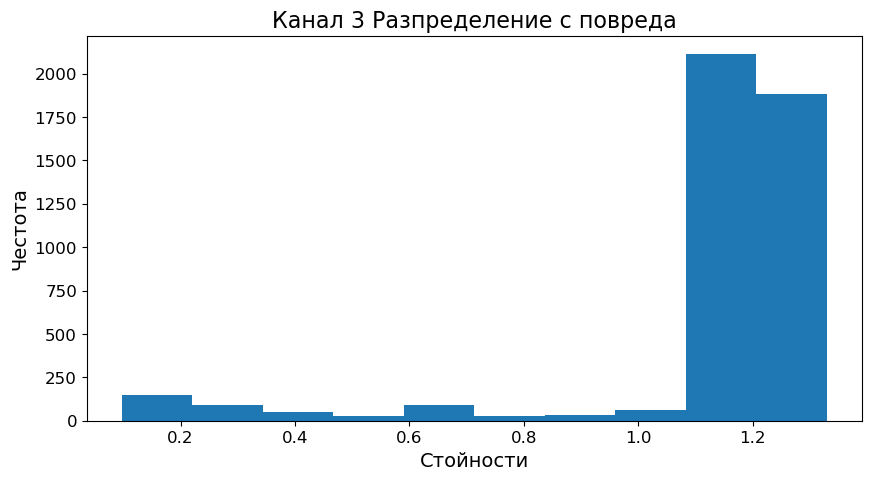

In [50]:
plt.figure(figsize=(10, 5))
plt.hist(c3_faulty)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Честота', fontdict= {'fontsize' : 14})
plt.xlabel('Стойности', fontdict= {'fontsize' : 14})
plt.title('Канал 3 Разпределение с повреда', fontdict={'fontsize' : 16})

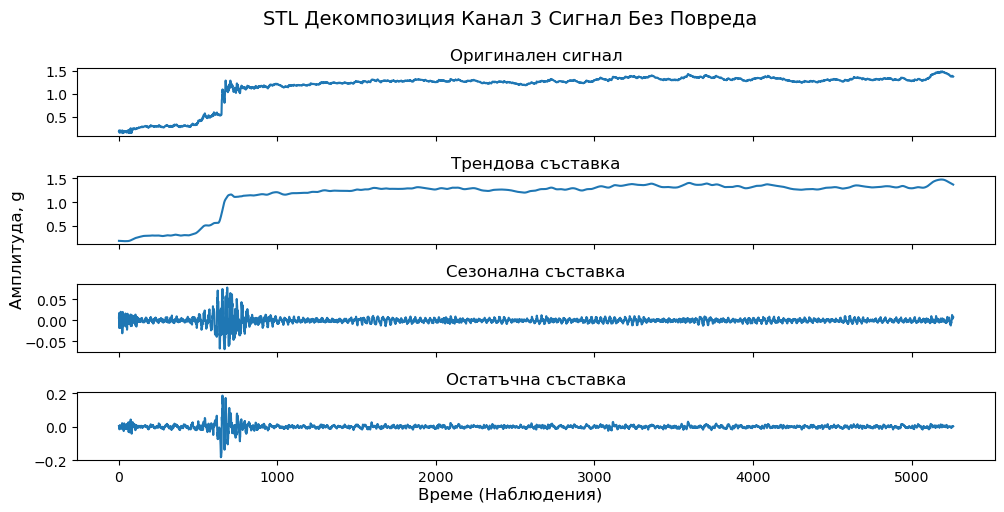

In [51]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(c3.reset_index(drop=True), period=30)  # period = season length
result = stl.fit()

fig, axs = plt.subplots(4, 1, figsize=(10, 5), sharex=True)
axs[0].plot(c3.reset_index(drop=True), label='Оригинален сигнал')
axs[0].set_title('Оригинален сигнал')
axs[1].plot(result.trend, label='Trend')
axs[1].set_title('Трендова съставка')
axs[2].plot(result.seasonal, label='Seasonal')
axs[2].set_title('Сезонална съставка')
axs[3].plot(result.resid, label='Остатък')
axs[3].set_title('Остатъчна съставка')
fig.suptitle('STL Декомпозиция Канал 3 Сигнал Без Повреда', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Overall X and Y labels
fig.text(0.5, 0.0001, 'Време (Наблюдения)', ha='center', fontsize=12)
fig.text(0.0001, 0.5, 'Амплитуда, g', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show()

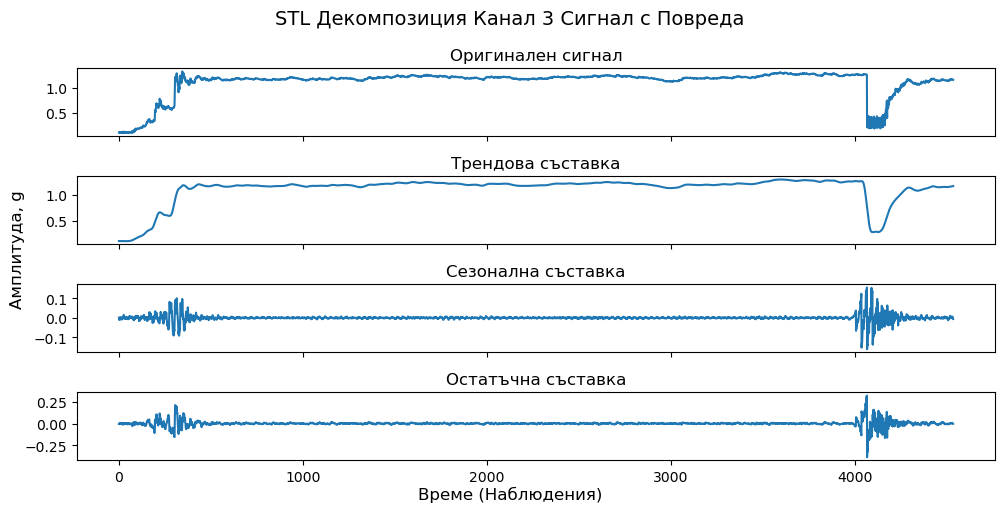

In [52]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(c3_faulty.reset_index(drop=True), period=30)  # period = season length
result = stl.fit()

fig, axs = plt.subplots(4, 1, figsize=(10, 5), sharex=True)
axs[0].plot(c3_faulty.reset_index(drop=True), label='Оригинален сигнал')
axs[0].set_title('Оригинален сигнал')
axs[1].plot(result.trend, label='Trend')
axs[1].set_title('Трендова съставка')
axs[2].plot(result.seasonal, label='Seasonal')
axs[2].set_title('Сезонална съставка')
axs[3].plot(result.resid, label='Остатък')
axs[3].set_title('Остатъчна съставка')
fig.suptitle('STL Декомпозиция Канал 3 Сигнал с Повреда', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Overall X and Y labels
fig.text(0.5, 0.0001, 'Време (Наблюдения)', ha='center', fontsize=12)
fig.text(0.0001, 0.5, 'Амплитуда, g', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show()

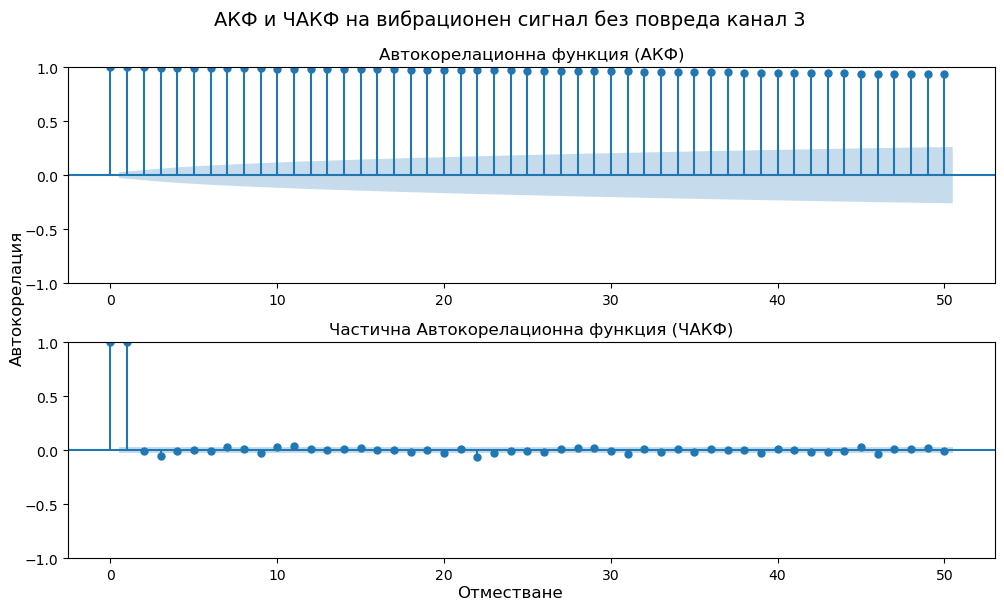

In [53]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assume 'series' is your vibration time series (e.g., Channel 1)
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Autocorrelation plot
plot_acf(c3, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Автокорелационна функция (АКФ)')

# Partial Autocorrelation plot
plot_pacf(c3, ax=axs[1], lags=50, alpha=0.05, method='ywm')  # or 'ld', 'ols'
axs[1].set_title('Частична Автокорелационна функция (ЧАКФ)')

# Overall layout adjustments
fig.suptitle('АКФ и ЧАКФ на вибрационен сигнал без повреда канал 3', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
fig.text(0.5, 0.0001, 'Отместване', ha='center', fontsize=12)
fig.text(0.0001, 0.5, 'Автокорелация', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show()

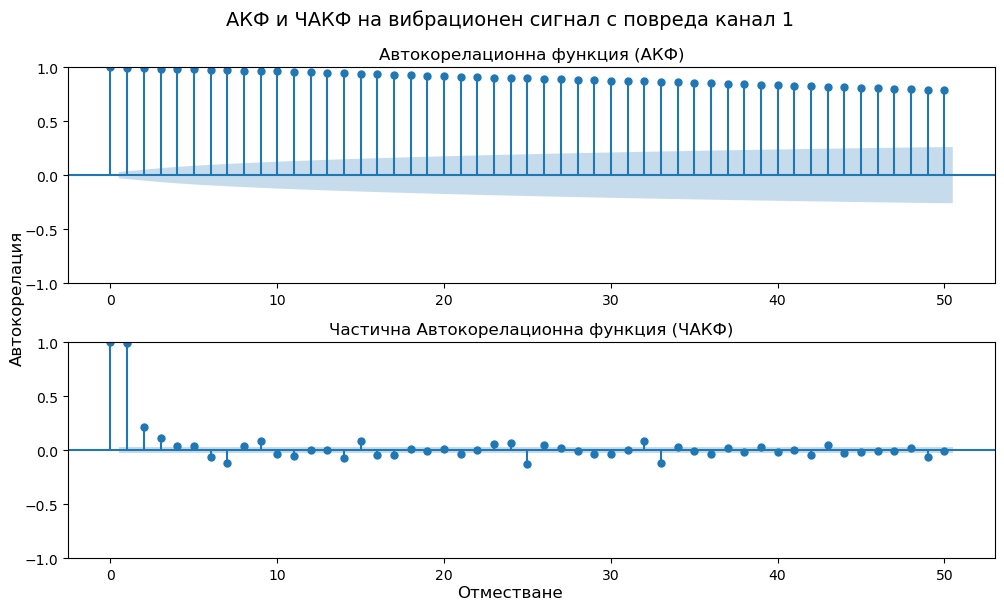

In [60]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assume 'series' is your vibration time series (e.g., Channel 1)
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Autocorrelation plot
plot_acf(c1_faulty, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Автокорелационна функция (АКФ)')

# Partial Autocorrelation plot
plot_pacf(c1_faulty, ax=axs[1], lags=50, alpha=0.05, method='ywm')  # or 'ld', 'ols'
axs[1].set_title('Частична Автокорелационна функция (ЧАКФ)')

# Overall layout adjustments
fig.suptitle('АКФ и ЧАКФ на вибрационен сигнал с повреда канал 1', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
fig.text(0.5, 0.0001, 'Отместване', ha='center', fontsize=12)
fig.text(0.0001, 0.5, 'Автокорелация', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
data_normalized = qt.fit_transform(c1.values.reshape(-1, 1)).flatten()

Text(0.5, 1.0, 'Канал 3 Разпределение без повреда, трансформиран с Quantile Transform')

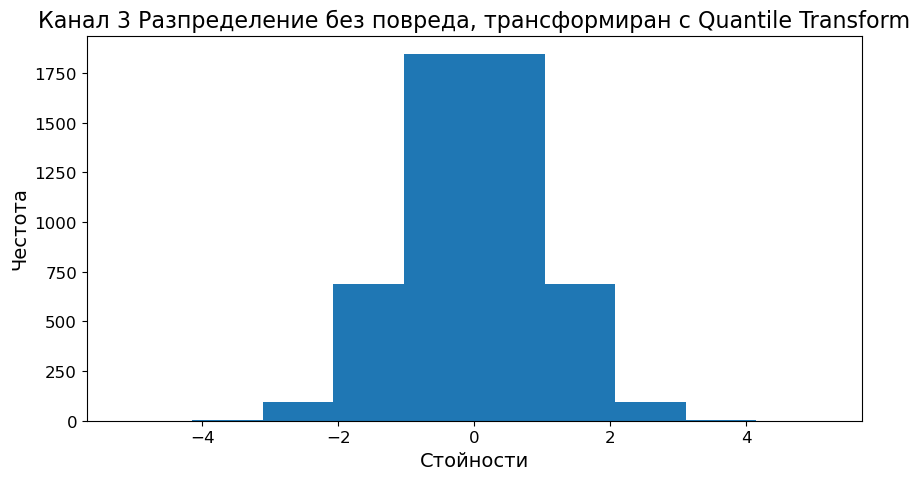

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
data_normalized = qt.fit_transform(c3.values.reshape(-1, 1)).flatten()

sds = StandardScaler()

plt.figure(figsize=(10, 5))
plt.hist(sds.fit_transform(data_normalized.reshape(-1, 1)))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Честота', fontdict= {'fontsize' : 14})
plt.xlabel('Стойности', fontdict= {'fontsize' : 14})
plt.title('Канал 3 Разпределение без повреда, трансформиран с Quantile Transform', fontdict={'fontsize' : 16})

Text(0.5, 1.0, 'Канал 3 Разпределение с повреда, трансформиран с Quantile Transform')

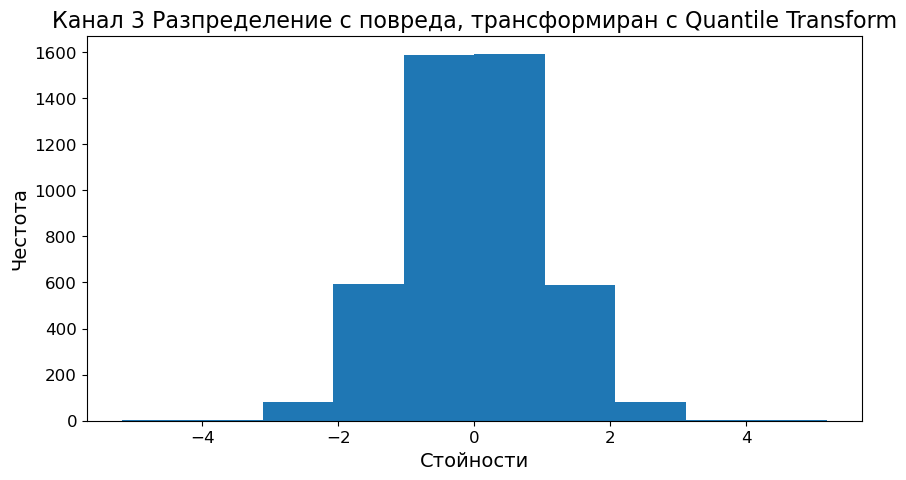

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
data_normalized = qt.fit_transform(c3_faulty.values.reshape(-1, 1)).flatten()

sds = StandardScaler()

plt.figure(figsize=(10, 5))
plt.hist(sds.fit_transform(data_normalized.reshape(-1, 1)))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Честота', fontdict= {'fontsize' : 14})
plt.xlabel('Стойности', fontdict= {'fontsize' : 14})
plt.title('Канал 3 Разпределение с повреда, трансформиран с Quantile Transform', fontdict={'fontsize' : 16})

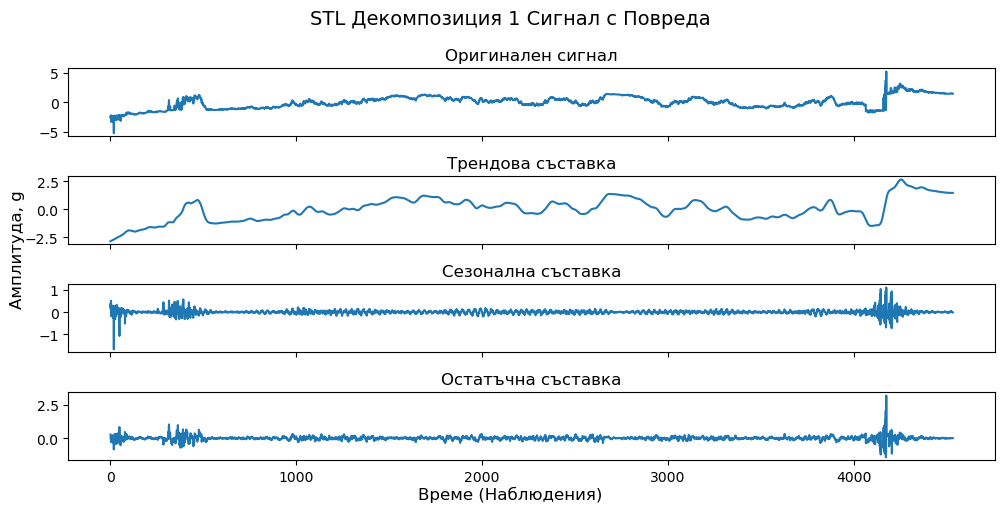

In [33]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(data_normalized, period=30)  # period = season length
result = stl.fit()

fig, axs = plt.subplots(4, 1, figsize=(10, 5), sharex=True)
axs[0].plot(data_normalized, label='Оригинален сигнал')
axs[0].set_title('Оригинален сигнал')
axs[1].plot(result.trend, label='Trend')
axs[1].set_title('Трендова съставка')
axs[2].plot(result.seasonal, label='Seasonal')
axs[2].set_title('Сезонална съставка')
axs[3].plot(result.resid, label='Остатък')
axs[3].set_title('Остатъчна съставка')
fig.suptitle('STL Декомпозиция 1 Сигнал с Повреда', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Overall X and Y labels
fig.text(0.5, 0.0001, 'Време (Наблюдения)', ha='center', fontsize=12)
fig.text(0.0001, 0.5, 'Амплитуда, g', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show()

In [61]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def _adf_test(x, alpha=0.05, regression='c', autolag='AIC'):
    """ADF: H0 = unit root (non-stationary)."""
    x = pd.Series(x).dropna().values
    res = adfuller(x, regression=regression, autolag=autolag)
    stat, pval, lags, nobs, crit, icbest = res[0], res[1], res[2], res[3], res[4], res[5]
    return {
        'adf_stat': stat,
        'adf_p': pval,
        'adf_lags': lags,
        'adf_nobs': nobs,
        'adf_crit_1%': crit['1%'],
        'adf_crit_5%': crit['5%'],
        'adf_crit_10%': crit['10%'],
        'adf_stationary': pval < alpha  # reject H0 ⇒ stationary
    }

def _kpss_test(x, alpha=0.05, regression='c', nlags='auto'):
    """
    KPSS: H0 = (trend-)stationary, H1 = unit root/non-stationary.
    regression='c' for level-stationarity; 'ct' for trend-stationarity.
    """
    x = pd.Series(x).dropna().values
    stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
    return {
        'kpss_stat': stat,
        'kpss_p': pval,
        'kpss_lags': lags,
        'kpss_crit_1%': crit['1%'],
        'kpss_crit_5%': crit['5%'],
        'kpss_crit_10%': crit['10%'],
        'kpss_stationary': pval > alpha  # fail to reject H0 ⇒ stationary
    }

def stationarity_report(obj, alpha=0.05, adf_reg='c', kpss_reg='c'):
    """
    obj: pandas Series or DataFrame.
    adf_reg/kpss_reg: 'c' (level), 'ct' (trend). For ADF you can also use 'nc' or 'ctt'.
    Returns a DataFrame with decisions and key stats.
    """
    def test_one(s):
        res = {}
        res.update(_adf_test(s, alpha=alpha, regression=adf_reg))
        res.update(_kpss_test(s, alpha=alpha, regression=kpss_reg))
        # consensus flag: both tests say stationary
        res['both_stationary'] = res['adf_stationary'] and res['kpss_stationary']
        return pd.Series(res)

    if isinstance(obj, pd.Series):
        out = test_one(obj)
        return out.to_frame('series').T
    else:
        return obj.apply(test_one).T

# --- optional helper: difference until stationary (simple) ---
def difference_until_stationary(x, max_diff=2, alpha=0.05, adf_reg='c', kpss_reg='c'):
    """
    Applies successive first-differences up to max_diff until both tests indicate stationarity.
    Returns (series_transformed, d, report) where d is number of differences applied.
    """
    s = pd.Series(x).dropna()
    for d in range(max_diff + 1):
        rep = stationarity_report(s, alpha=alpha, adf_reg=adf_reg, kpss_reg=kpss_reg)
        if rep['both_stationary'].iloc[0]:
            return s, d, rep
        s = s.diff().dropna()
    return s, max_diff, rep  # last attempt's report


In [67]:
# For a single series
rep = stationarity_report(c1, alpha=0.05, adf_reg='c', kpss_reg='c')
print(rep[['adf_p', 'kpss_p']])

           adf_p kpss_p
series  0.008994   0.01


C:\Users\Hacko Academic\AppData\Local\Temp\ipykernel_1644\4053063321.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
